# Video Games Sales Data Analysis

This project aims to analyze sales, from 1980 to 2020, of video games with sales greater than 100,000 copies.

In this project I have used a dataset from Kaggle:
> - [Kaggle dataset](https://www.kaggle.com/datasets/gregorut/videogamesales)

## Questions

1. Which publishers have the highest video game sales?
2. How do the top 10 selling games perform in each region?
3. What is the distribution of genres in the top 100 selling games?

## Notebook Content

**Step 1:** Install + Import Necessary Libraries
<br>**Step 2:** Dataset Description + Data Cleaning
<br>**Step 3:** Data Operation + Data Visualization
<br>**Step 4: Summary of Video Games Sales Data Analysis**

## Step 1: Install + Import Necessary Libraries

In [1]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

## Step 2: Dataset Description + Data Cleaning

### Understanding the Data

In [3]:
data = pd.read_csv('vgsales.csv')

In [4]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
rows_columns = data.shape
print(rows_columns)
print(f"The data has {rows_columns[0]} rows and {rows_columns[1]} columns.")

(16598, 11)
The data has 16598 rows and 11 columns.


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


In [7]:
print(data.describe())

               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  


### Description of Data Composition

#### Explanation of Columns
- Rank: ranking of the video game based on overall sales
- Name: name of the video game
- Platform: platform the video game was released on (PC, PS4, etc.)
- Year: year of the video game's release
- Genre: genre of the video game
- Publisher: publisher of the video game
- NA_Sales: sales of the video game in North America (in millions)
- EU_Sales: sales of the video game in Europe (in millions)
- JP_Sales: sales of the video game in Japan (in millions)
- Other_Sales: sales of the video game in the rest of the world (in millions)
- Global_Sales: total worldwide sales of the video game (in millions)

#### Initial Insights
- The data has 16598 rows and 11 columns
- The columns Year and Publisher are missing values
- The earliest year in the dataset is 1980 and the latest year is 2020

### Data Cleaning

In [8]:
data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [9]:
# Check for null values
print(data.isnull().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [10]:
# Drop rows with null values
data.dropna(how="any", inplace = True)

# Check for null values again
print(data.isnull().sum())

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


## Step 3: Data Operation + Data Visualization

### Question 1: Which publishers have the highest video game sales?

In [11]:
# Select Publisher and Global_Sales columns
top_publisher = data[['Publisher','Global_Sales']]

top_publisher = top_publisher.groupby(['Publisher']).sum().sort_values(by='Global_Sales', ascending=False).head(10)

top_publisher.head()

,Global_Sales
Publisher,
Nintendo,1784.43
Electronic Arts,1093.39
Activision,721.41
Sony Computer Entertainment,607.28
Ubisoft,473.54


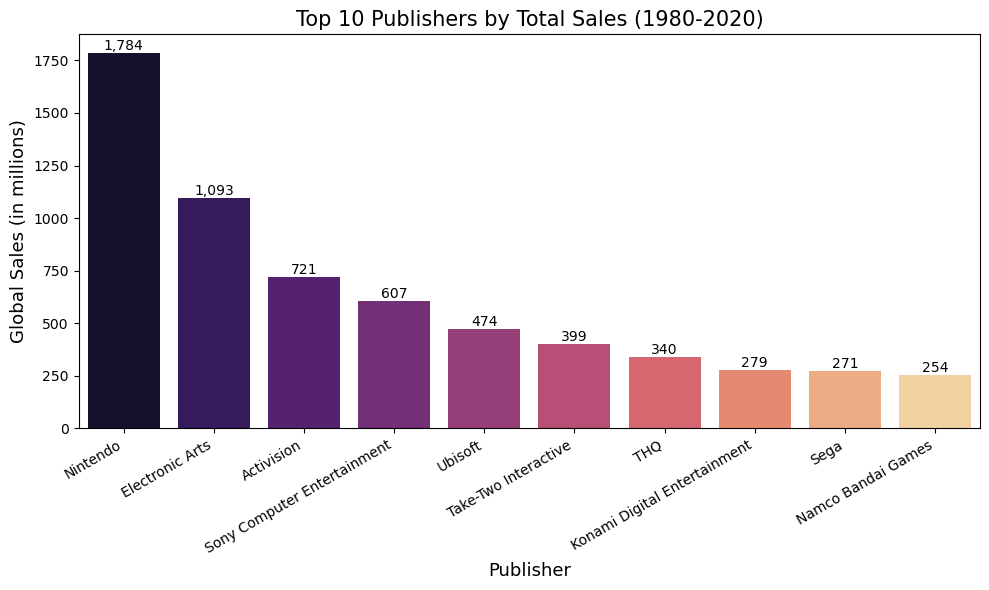

In [12]:
# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_publisher, x=top_publisher.index, y='Global_Sales', palette='magma')

# Add labels and title
plt.xlabel('Publisher', fontsize=13)
plt.ylabel('Global Sales (in millions)', fontsize=13)
plt.title('Top 10 Publishers by Total Sales (1980-2020)', fontsize=15)

# Rotate + resize x-axis labels for better readability
plt.xticks(rotation=30, ha='right')

# Add text annotations for the values
for i, value in enumerate(top_publisher['Global_Sales']):
    plt.text(i, value, str(format(value,',.0f')), ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()

#### Interpretation of Findings
- Nintendo is the top publisher in terms of sales with 1.784 billion total global sales from 1980 to 2020, followed by Electronic Arts and Activision with 1.093 billion and 721 million global sales, respectively
- Nintendo and Electronic Arts are the only two publishers to exceed a billion global sales in the data ranging from 1980 to 2020
- Namco Bandai Games is tenth on the list of top ten selling publishers with 254 million total sales, which is 1.53 billion less sales than Nintendo

### Question 2: Comparison of sales of the top 10 selling video games across North America, Europe, Japan, and other regions.

In [41]:
# Select the top 10 video games and their sales data
top_games = data.sort_values(by='Global_Sales', ascending=False).head(10)
top_games = top_games[['Name','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

top_games.head()

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii Sports,41.49,29.02,3.77,8.46
1,Super Mario Bros.,29.08,3.58,6.81,0.77
2,Mario Kart Wii,15.85,12.88,3.79,3.31
3,Wii Sports Resort,15.75,11.01,3.28,2.96
4,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00


In [70]:
# Convert the data to long format
top_games_long = pd.melt(top_games, id_vars='Name', var_name='Region').rename(columns={'value':'Sales'})
top_games_long.replace({'Region': {'NA_Sales': 'North America', 'EU_Sales': 'Europe', 'JP_Sales':'Japan', 'Other_Sales':'Other'}}, inplace=True)

# Sort the data
df_global_sales = top_games_long.groupby('Name')['Sales'].sum().reset_index()
df_merged = pd.merge(top_games_long, df_global_sales, on='Name', suffixes=('', '_Global'))
df_sorted = df_merged.sort_values(by=['Sales_Global', 'Sales'], ascending=[False, True])

df_sorted.head()

,Name,Region,Sales,Sales_Global
2,Wii Sports,Japan,3.77,82.74
3,Wii Sports,Other,8.46,82.74
1,Wii Sports,Europe,29.02,82.74
0,Wii Sports,North America,41.49,82.74
7,Super Mario Bros.,Other,0.77,40.24


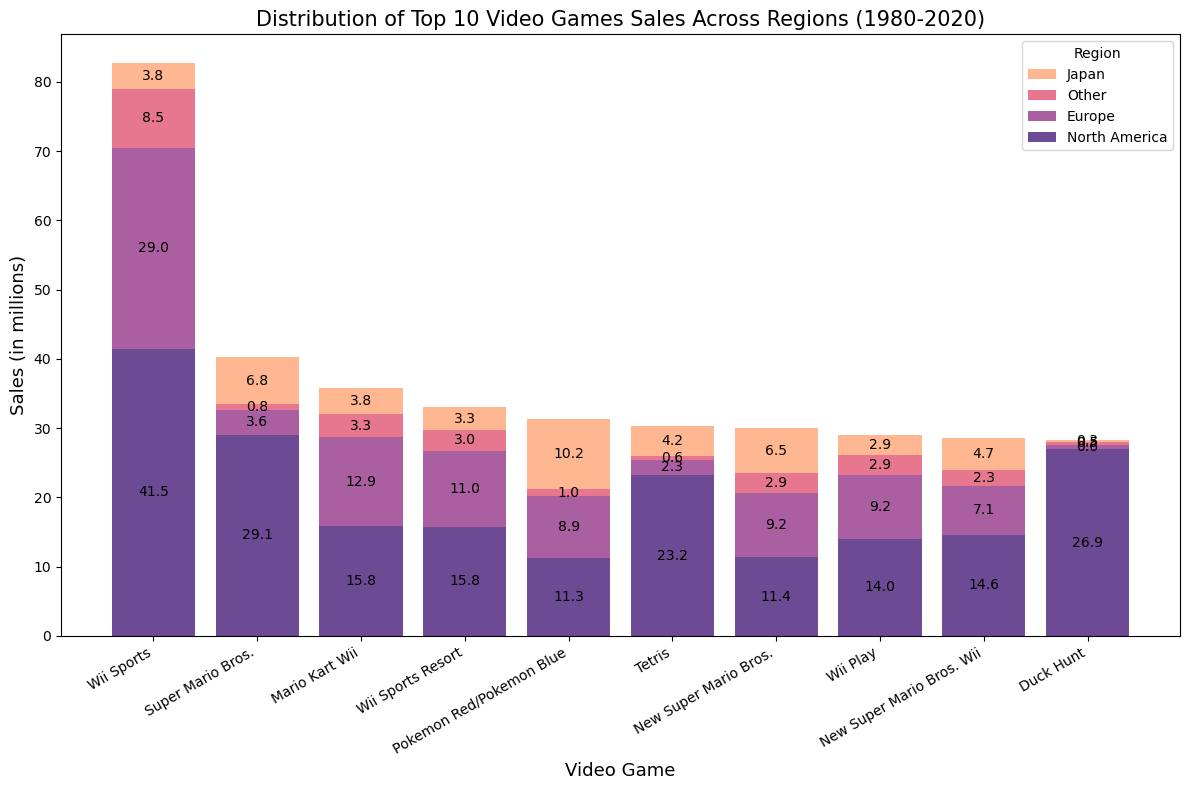

In [80]:
palette = sns.color_palette("magma", n_colors=4)
palette.reverse()

# Create a grouped bar plot
plt.figure(figsize=(12,8))
ax = sns.histplot(data=df_sorted, x='Name', weights='Sales', hue='Region', multiple='stack', shrink=0.8, linewidth=0, palette=palette)

# Add labels and title
plt.xlabel('Video Game', fontsize=13)
plt.ylabel('Sales (in millions)', fontsize=13)
plt.title('Distribution of Top 10 Video Games Sales Across Regions (1980-2020)', fontsize=15)

for c in ax.containers:
    # annotate the container group
    ax.bar_label(c, label_type='center', fontsize=10, fmt='%.1f')
    
# Rotate + resize x-axis labels for better readability
plt.xticks(rotation=30, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

#### Interpretation of Findings
- North America consistently outperforms other regions in terms of sales of the global top 10 selling video games
- The only games where their sales in Japan beats out their sales in Europe are Super Mario Bros., Pokemon Red/Pokemon Blue, and Tetris
- Sales for Duck Hunt seem to be mostly from North America, with 26.9 million sales, while the game sold far less in other regions, with only 1.4 million sales combined
- Pokemon Red/Pokemon Blue seems to have the most evenly distributed sales among North America, Europe, and Japan, with about 30 million total sales, of which around 10 million units have been sold in each region

### Question 3: What genre shows up most in the top 100 video games?

In [16]:
# Select top 100 video games
top_games = data.sort_values(by='Global_Sales', ascending=False).head(100)

# Add up how many times each genre shows up
top_games = pd.DataFrame(top_games[['Genre']].value_counts()).reset_index().rename({'count':'Number of Games'}, axis=1)

top_games.head()

,Genre,Number of Games
0,Shooter,22
1,Platform,16
2,Role-Playing,15
3,Action,12
4,Racing,10


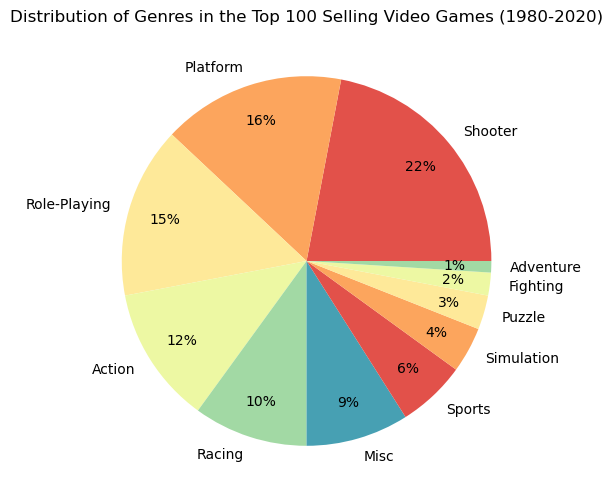

In [17]:
# Create a pie chart
plt.figure(figsize=(10,6))
plt.pie(top_games['Number of Games'], labels=top_games['Genre'], autopct='%1.0f%%', colors=sns.color_palette('Spectral'), pctdistance=0.8)
plt.title('Distribution of Genres in the Top 100 Selling Video Games (1980-2020)')
plt.show()


#### Interpretation of Findings
- The Shooter genre make up the greatest portion of the top 100 selling video games, with 22%, followed by Platform and Role-Playing genres, with 16% and 15% respectively
- The Adventure genre make up the smallest portion of the top 100 video games, with 1%
- There is a total of 11 genres represented in the top 100 selling video games

## Step 4: Summary of Video Game Sales Data Analysis

### Overview
In this data analysis, I looked at the data of video game sales, ranging from 1980 to 2020, of video games with sales greater than 100,000 copies. I analyzed the top 10 publishers by global sales, the distribution of top 100 selling video games across regions, and the distribution of genres in the top 100 selling video games. This is the summary of my analysis:

**Graph 1: Top 10 Publishers by Global Sales**
<br>For this analysis, I created a bar chart after subselecting the Publisher and Global_Sales columns, sorting the rows by descending Global_Sales values, and selecting the top 10 results. I used the publisher names as the x-axis and global sales in millions as the y-axis.
- **Key Discoveries**
    -  Nintendo is the top publisher in terms of sales with 1.784 billion total global sales from 1980 to 2020
    - Nintendo and Electronic Arts are the only two publishers to exceed a billion global sales in the data ranging from 1980 to 2020
    - Namco Bandai Games is tenth on the list of top ten selling publishers with 254 million total sales, which is 1.53 billion less sales than Nintendo

**Graph 2: Distribution of Top 10 Selling Video Games Across Regions**
<br> I selected the top 10 selling video games and kept the relevant columns containing the video game names and their sales in each region. After that, I transformed the long data into wide data and sorted it so that I can create a stacked bar chart using the video game names as the x-axis and sales in millions as the y-axis. This displays the sales of each video game in each region represented as its own bar.
- **Key Discoveries**
    - North America consistently outperforms other regions in terms of sales of the global top 10 selling video games
    - The only games where their sales in Japan beats out their sales in Europe are Super Mario Bros., Pokemon Red/Pokemon Blue, and Tetris
    - Sales for Duck Hunt seem to be mostly from North America, with 26.9 million sales, while the game sold far less in other regions, with only 1.4 million sales combined
    - Pokemon Red/Pokemon Blue seems to have the most evenly distributed sales among North America, Europe, and Japan, with about 30 million total sales, of which around 10 million units have been sold in each region

**Graph 3: Distribution of Genres in the Top 100 Selling Video Games**
<br> I selected the top 100 selling video games and counted how many times each genre appears within those 100 video games. I made sure to save the results as a pandas dataframe so that I can create a pie chart using the number of games in each genre as the x value and the genres as the labels.
- **Key Discoveries**
    - The Shooter genre make up the greatest portion of the top 100 selling video games, with 22%, followed by Platform and Role-Playing genres, with 16% and 15% respectively
    - The Adventure genre make up the smallest portion of the top 100 video games, with 1%
    - There are a total of 11 genres represented in the top 100 selling video games

### Potential Actions for Further Analysis
Several actions could be taken for further analysis. This includes:
- Using statistical analysis to find the correlation between the genre of a game and how well it performs in terms of sales
- Investigating sales performance on different gaming platforms
- Identifying trends in genre popularity over time
- Analyzing the sales of video game publishers over time